# preliminary

In [87]:
import pickle, os
import numpy as np
from numpy.linalg import matrix_power

In [21]:
root_path = '/Users/jiahang/Documents/dagma/src/dagma/'
n_nodes = 60

In [396]:
with open(os.path.join(root_path, 'simulated_data/v11/v60/W/W_2_0.pkl'), 'rb') as f:
    W_2_0 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v11/v60/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
    
W = W_2_0['W_est'][:, :n_nodes]
W_true = X['W_true']
B_true = (W_true != 0)
W_est = W_2_0['W_est']

In [59]:
Z = np.abs(W[:n_nodes, :]) - np.abs(W[n_nodes:, :])
Z0, Z1 = Z[~B_true], Z[B_true]

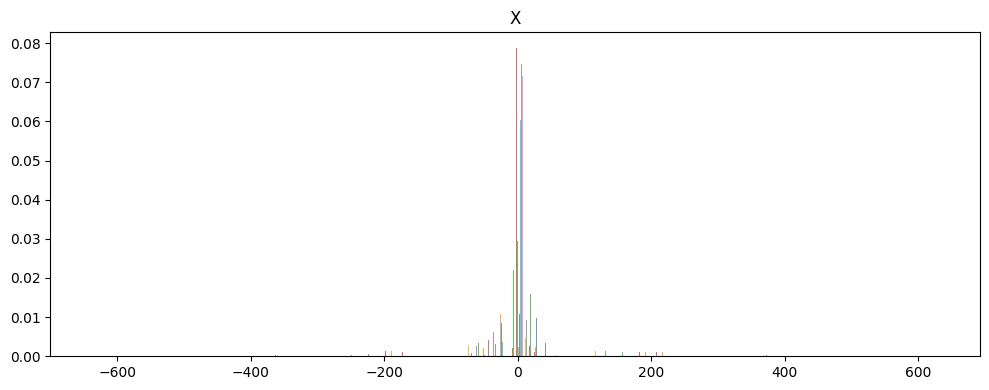

In [406]:
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, figsize=(10, 4))
axs.hist(X['X'], bins=100, density=True, alpha=0.7)
axs.set_title('X')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

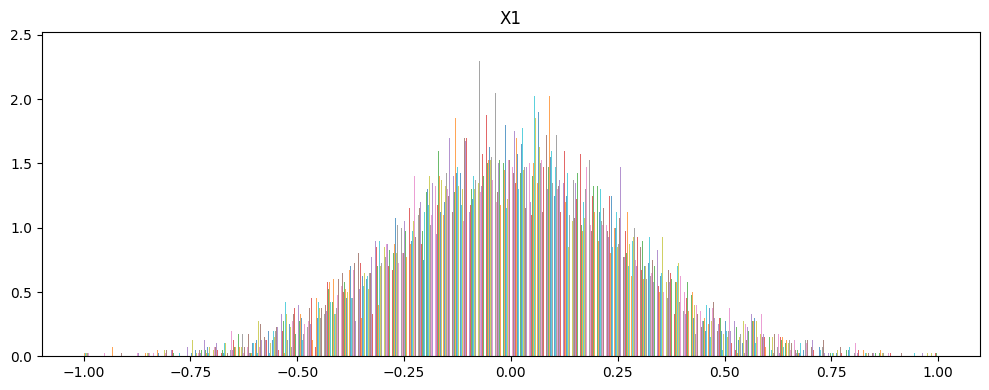

In [245]:
X0 = X['X']
max_abs_col = np.abs(X0).max(axis=0).reshape(1, -1)
X1 = X0 / (max_abs_col + 1e-8)

# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, figsize=(10, 4))
axs.hist(X1, bins=100, density=True, alpha=0.7)
axs.set_title('X1')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [250]:
np.abs(X1[:, 10]).max()

0.9999999995627941

# distributions of knockoff statistics

## misc

In [439]:
with open(os.path.join(root_path, 'simulated_data/v11/v40/W/W_2_0.pkl'), 'rb') as f:
    W_2_0_40 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v11/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W_40 = W_2_0_40['W_est'][:, :n_nodes]
W_true_40 = X['W_true']
B_true_40 = (W_true_40 != 0)
W_est_40 = W_2_0_40['W_est']

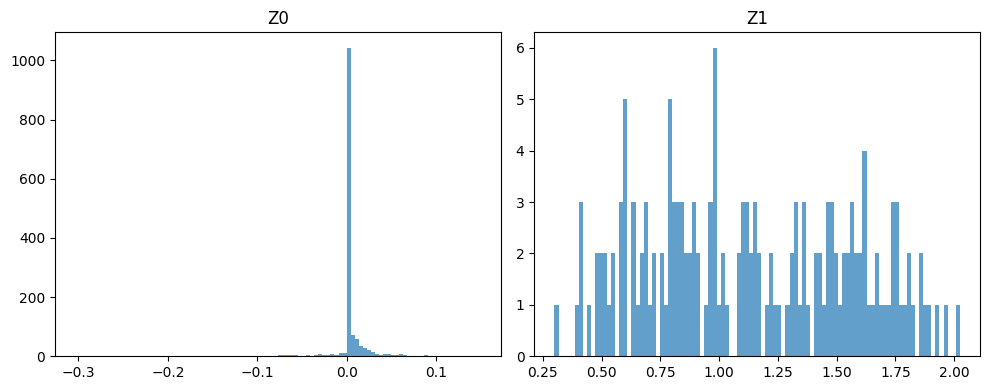

In [441]:
Z_40 = np.abs(W_40[:n_nodes, :]) - np.abs(W_40[n_nodes:, :])
Z0_40, Z1_40 = Z_40[~B_true_40], Z_40[B_true_40]

# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(Z0_40, bins=100, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1_40, bins=100, alpha=0.7)
axs[1].set_title('Z1')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [442]:
Z_ord = Z0_40
Z_ord_name = 'Z0'
print(f'{Z_ord_name} > 0.: {(Z_ord > 0).sum() / Z_ord.shape[0] * 100:.2f}%')
print(f'{Z_ord_name} < 0.: {(Z_ord < -0).sum() / Z_ord.shape[0] * 100:.2f}%')

Z0 > 0.: 67.92%
Z0 < 0.: 29.31%


In [445]:
Z_ord = Z0_40
Z_ord_name = 'Z0'
print(f'{Z_ord_name} > 1e-1: {(Z_ord > 1e-1).sum() / Z_ord.shape[0] * 100:.2f}%')
print(f'{Z_ord_name} < -1e-1: {(Z_ord < -1e-1).sum() / Z_ord.shape[0] * 100:.2f}%')

Z0 > 1e-1: 0.21%
Z0 < -1e-1: 1.39%


In [447]:
val = 5e-3
Z_ord = Z0_40
Z_ord_name = 'Z0'
print(f'{Z_ord_name} > {val}: {(Z_ord > val).sum() / Z_ord.shape[0] * 100:.2f}%')
print(f'{Z_ord_name} < -{val}: {(Z_ord < -val).sum() / Z_ord.shape[0] * 100:.2f}%')

Z0 > 0.005: 18.47%
Z0 < -0.005: 6.88%


## main

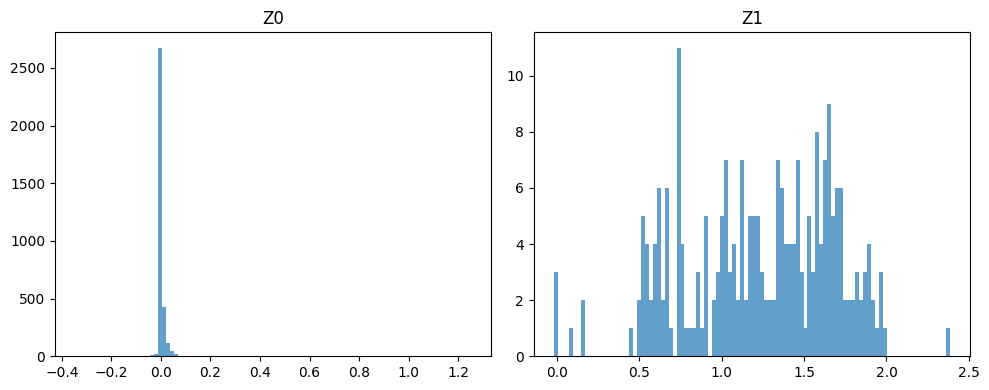

In [416]:
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(Z0, bins=100, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1, bins=100, alpha=0.7)
axs[1].set_title('Z1')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [210]:
Z_ord.max()

1.2540541368384213

In [211]:
Z_ord.min()

-0.3481732028306248

In [180]:
Z_ord = Z0
Z_ord_name = 'Z0'
print(f'{Z_ord_name} > 5e-3: {(Z_ord > 5e-3).sum() / Z_ord.shape[0] * 100:.2f}%')
print(f'{Z_ord_name} < 5e-3: {(Z_ord < -5e-3).sum() / Z_ord.shape[0] * 100:.2f}%')

Z0 > 5e-3: 17.98%
Z0 < 5e-3: 2.26%


In [419]:
Z_ord = Z0
Z_ord_name = 'Z0'
print(f'{Z_ord_name} > 0.2: {(Z_ord > 0.2).sum() / Z_ord.shape[0] * 100:.2f}%')
print(f'{Z_ord_name} < 0.2: {(Z_ord < 0.2).sum() / Z_ord.shape[0] * 100:.2f}%')

Z0 > 0.2: 0.60%
Z0 < 0.2: 99.40%


In [412]:
Z_ord = Z0
Z_ord_name = 'Z0'
print(f'{Z_ord_name} > 0.: {(Z_ord > 0).sum() / Z_ord.shape[0] * 100:.2f}%')
print(f'{Z_ord_name} < 0.: {(Z_ord < -0).sum() / Z_ord.shape[0] * 100:.2f}%')

Z0 > 0.: 72.56%
Z0 < 0.: 25.65%


In [420]:
Z_ord = Z0
Z_ord_name = 'Z0'
print(f'{Z_ord_name} > 1e-3: {(Z_ord > 1e-3).sum() / Z_ord.shape[0] * 100:.2f}%')
print(f'{Z_ord_name} < 1e-3: {(Z_ord < -1e-3).sum() / Z_ord.shape[0] * 100:.2f}%')

Z0 > 1e-3: 30.39%
Z0 < 1e-3: 3.18%


# distribution of knockoff statistics of null edges

In [429]:
W_true_powers = [W_true] + [matrix_power(W_true, i) for i in range(2, 11)]
B_true_powers = [0] + [W != 0 for W in W_true_powers]
W_ori, W_kno = W[:n_nodes, :], W[n_nodes:, :]

In [430]:
len(W_true_powers)

10

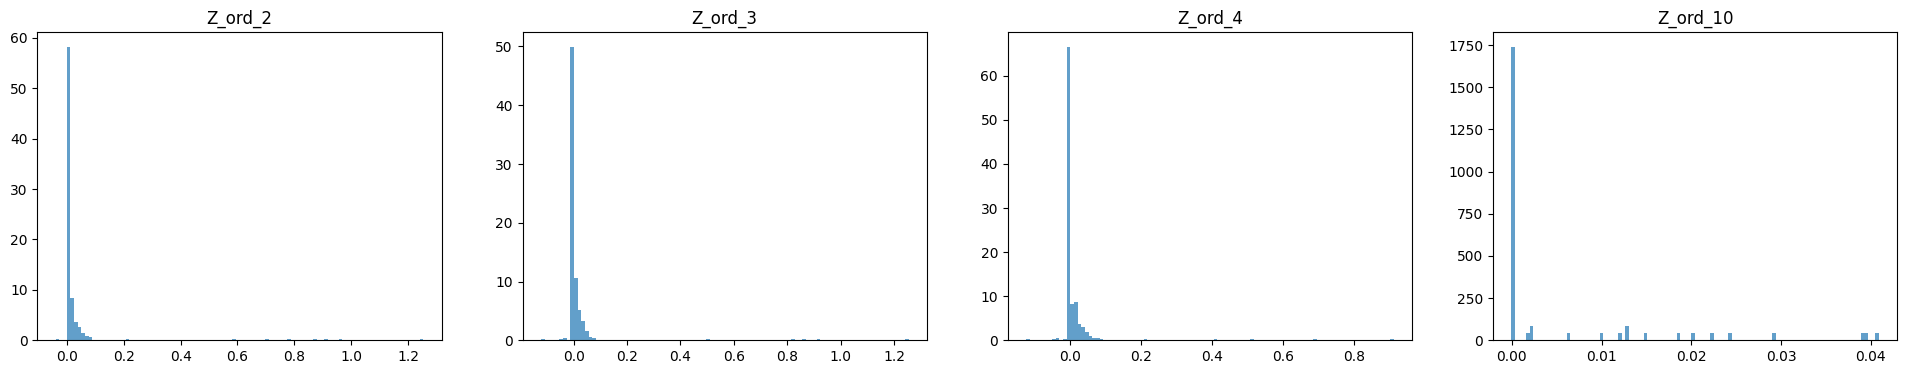

In [144]:
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(24, 4))

mask = B_true_powers[2] & ~B_true_powers[1] # get cascaded null edges
Z_ord_2 = np.abs(W_ori[mask]) - np.abs(W_kno[mask])
axs[0].hist(Z_ord_2, bins=100, density=True, alpha=0.7)
axs[0].set_title('Z_ord_2')

mask = B_true_powers[3] & ~B_true_powers[1] # get cascaded null edges
Z_ord_3 = np.abs(W_ori[mask]) - np.abs(W_kno[mask])
axs[1].hist(Z_ord_3, bins=100, density=True, alpha=0.7)
axs[1].set_title('Z_ord_3')

mask = B_true_powers[4] & ~B_true_powers[1] # get cascaded null edges
Z_ord_4 = np.abs(W_ori[mask]) - np.abs(W_kno[mask])
axs[2].hist(Z_ord_4, bins=100, density=True, alpha=0.7)
axs[2].set_title('Z_ord_4')

W_true_ord_10 = matrix_power(W_true, 10)
B_true_ord_10 = (W_true_ord_10 != 0)
mask = B_true_ord_10 & ~B_true_powers[1] # get cascaded null edges
Z_ord_10 = np.abs(W_ori[mask]) - np.abs(W_kno[mask])
axs[3].hist(Z_ord_10, bins=100, density=True, alpha=0.7)
axs[3].set_title('Z_ord_10')

# Adjust spacing between subplots
# plt.tight_layout()

# Show the plot
plt.show()

In [434]:
def print_precent(val):
    for i in range(1, 10):
        order = i + 1
        mask = B_true_powers[order] & ~B_true_powers[1] # get cascaded null edges
        Z = np.abs(W_ori[mask]) - np.abs(W_kno[mask])
        name = f'Z_{order}'
        print(f'{name} > {val}: {(Z > val).sum() / Z.shape[0] * 100:.2f}% | '
              f'{name} < {-val if val != 0. else val}: {(Z < -val).sum() / Z.shape[0] * 100:.2f}%'
        )



In [435]:
val = 0
print_precent(val)

Z_2 > 0: 71.97% | Z_2 < 0: 28.03%
Z_3 > 0: 68.06% | Z_3 < 0: 31.94%
Z_4 > 0: 69.38% | Z_4 < 0: 30.62%
Z_5 > 0: 70.81% | Z_5 < 0: 29.19%
Z_6 > 0: 70.53% | Z_6 < 0: 29.47%
Z_7 > 0: 67.15% | Z_7 < 0: 32.85%
Z_8 > 0: 66.23% | Z_8 < 0: 33.77%
Z_9 > 0: 61.62% | Z_9 < 0: 38.38%
Z_10 > 0: 67.80% | Z_10 < 0: 32.20%


In [436]:
val = 5e-3
print_precent(val)

Z_2 > 0.005: 32.32% | Z_2 < -0.005: 0.25%
Z_3 > 0.005: 24.45% | Z_3 < -0.005: 1.10%
Z_4 > 0.005: 25.84% | Z_4 < -0.005: 1.20%
Z_5 > 0.005: 24.57% | Z_5 < -0.005: 1.45%
Z_6 > 0.005: 23.86% | Z_6 < -0.005: 1.40%
Z_7 > 0.005: 20.77% | Z_7 < -0.005: 0.97%
Z_8 > 0.005: 18.54% | Z_8 < -0.005: 0.66%
Z_9 > 0.005: 20.20% | Z_9 < -0.005: 0.00%
Z_10 > 0.005: 23.73% | Z_10 < -0.005: 0.00%


In [437]:
val = 5e-2
print_precent(val)

Z_2 > 0.05: 5.56% | Z_2 < -0.05: 0.00%
Z_3 > 0.05: 3.08% | Z_3 < -0.05: 0.22%
Z_4 > 0.05: 3.83% | Z_4 < -0.05: 0.24%
Z_5 > 0.05: 2.31% | Z_5 < -0.05: 0.29%
Z_6 > 0.05: 2.81% | Z_6 < -0.05: 0.35%
Z_7 > 0.05: 1.93% | Z_7 < -0.05: 0.48%
Z_8 > 0.05: 1.32% | Z_8 < -0.05: 0.66%
Z_9 > 0.05: 0.00% | Z_9 < -0.05: 0.00%
Z_10 > 0.05: 0.00% | Z_10 < -0.05: 0.00%


# distribution of knockoff weights

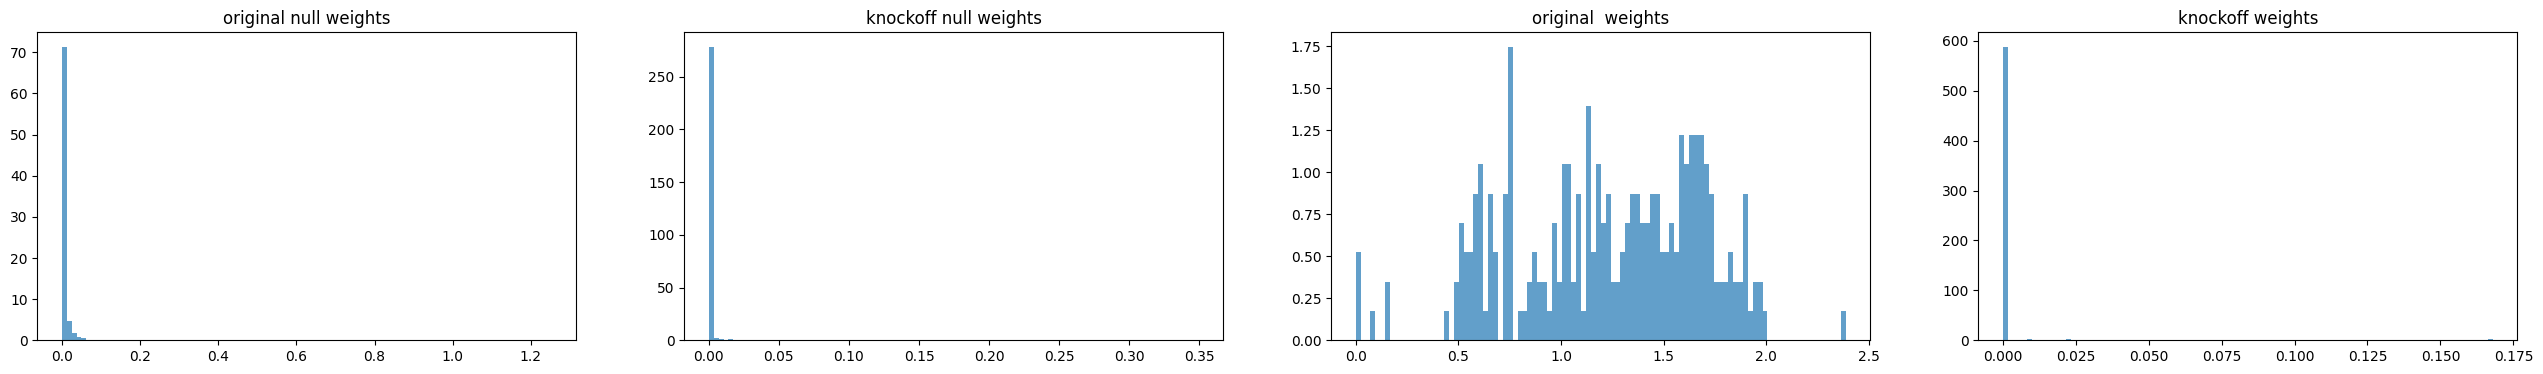

In [410]:
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(32, 4))

axs[0].hist(np.abs(W_ori[~B_true]), bins=100, density=True, alpha=0.7)
axs[0].set_title('original null weights')

axs[1].hist(np.abs(W_kno[~B_true]), bins=100, density=True, alpha=0.7)
axs[1].set_title('knockoff null weights')

axs[2].hist(np.abs(W_ori[B_true]), bins=100, density=True, alpha=0.7)
axs[2].set_title('original  weights')

axs[3].hist(np.abs(W_kno[B_true]), bins=100, density=True, alpha=0.7)
axs[3].set_title('knockoff weights')


# Adjust spacing between subplots
# plt.tight_layout()

# Show the plot
plt.show()